# Notebook 1: Modelo de Carga
En este notebook vamos a implementar el algoritmo de clustering jerárquico en R con ayuda de la función hclust. Utilizaremos como ejemplo el modelo de carga web visto durante la sesión y cuyos datos se encuentran en el archivo cargaWeb.csv

In [6]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #fila se utiliza 
#como vector de nombres de las columnas
datos <-read.table("cargaWeb.csv",dec=".",sep=";",header=TRUE)
print(datos)
summary(datos)

   Vnavega Vbusqueda VagregaCarro Vselecciona Vpaga
1        5        12            2           5     1
2       10        15            1          14     0
3        4         7            2           4     1
4       18        20            3          15     0
5        4        12            2           7     1
6        6        11            3           7     1
7        7        12            2           7     1
8        5         4            1           2     1
9        7        10            1           8     1
10      15        20            1          18     0


    Vnavega        Vbusqueda      VagregaCarro  Vselecciona       Vpaga     
 Min.   : 4.00   Min.   : 4.00   Min.   :1.0   Min.   : 2.0   Min.   :0.00  
 1st Qu.: 5.00   1st Qu.:10.25   1st Qu.:1.0   1st Qu.: 5.5   1st Qu.:0.25  
 Median : 6.50   Median :12.00   Median :2.0   Median : 7.0   Median :1.00  
 Mean   : 8.10   Mean   :12.30   Mean   :1.8   Mean   : 8.7   Mean   :0.70  
 3rd Qu.: 9.25   3rd Qu.:14.25   3rd Qu.:2.0   3rd Qu.:12.5   3rd Qu.:1.00  
 Max.   :18.00   Max.   :20.00   Max.   :3.0   Max.   :18.0   Max.   :1.00  

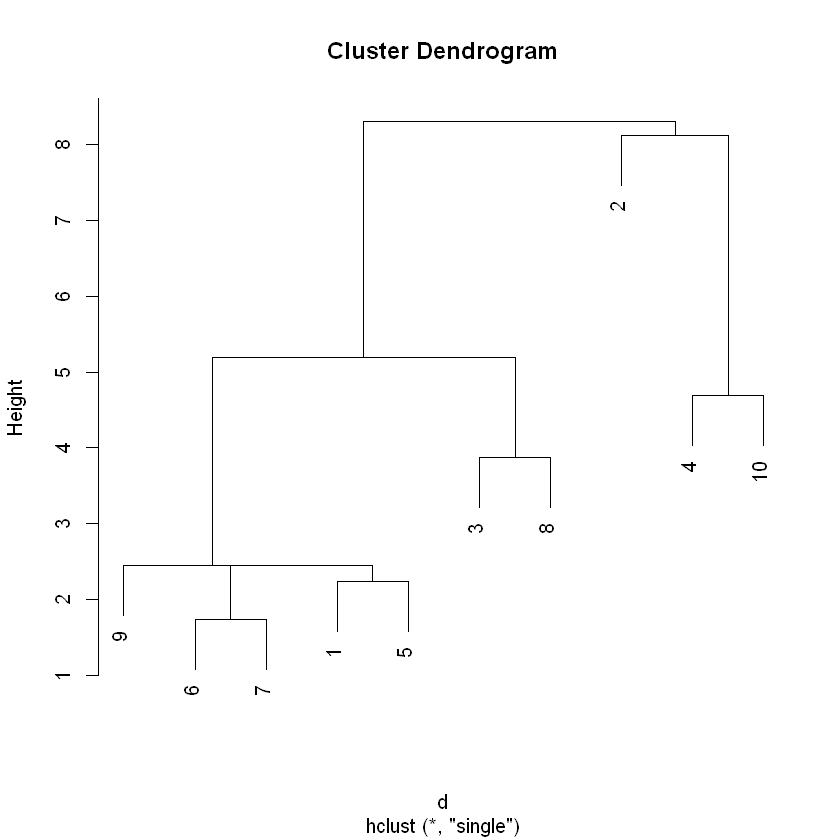

In [12]:
d <- dist(datos)
hd <- hclust(d, method = "single", members=NULL)
plot(hd, labels = NULL, hang = 0.1, axes = TRUE, frame.plot = FALSE, ann = TRUE, main = "Cluster Dendrogram",sub = NULL, xlab = NULL, ylab = "Height")


### Ejercicio 1: 
1. Defina el número de grupos mas adecuado para estos datos y caracterice los grupos obtenidos.
2. Considere las otras distancias entre grupos disponibles y descubra si hay diferencias en la jerarquía obtenida

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.9145280 1.0313641 0.4032833 0.2899160 0.1555054 

 5  variables and  10 observations.


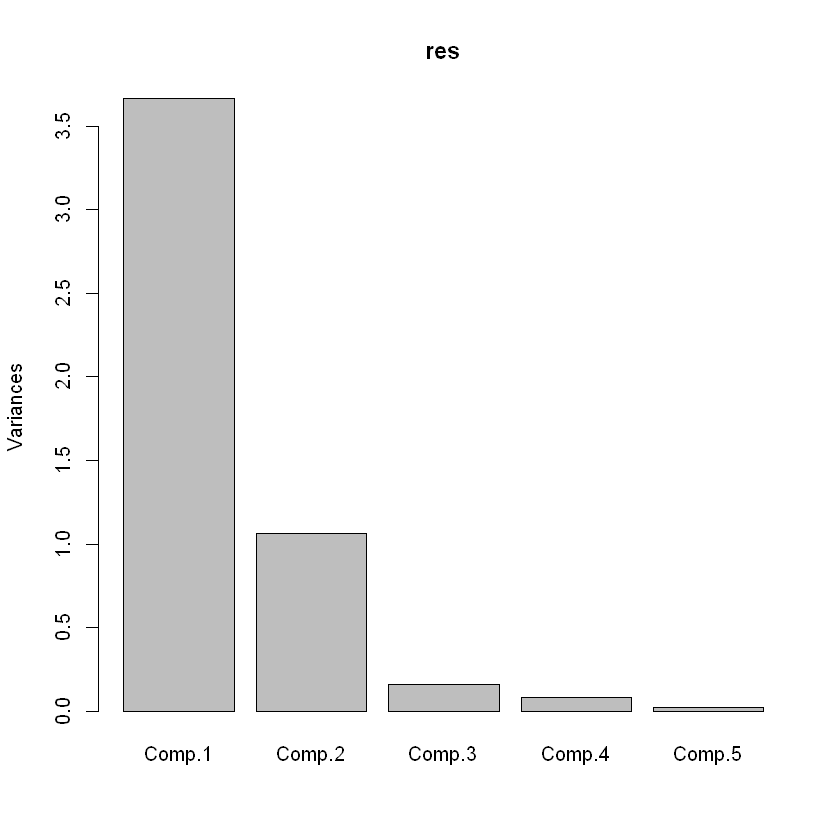

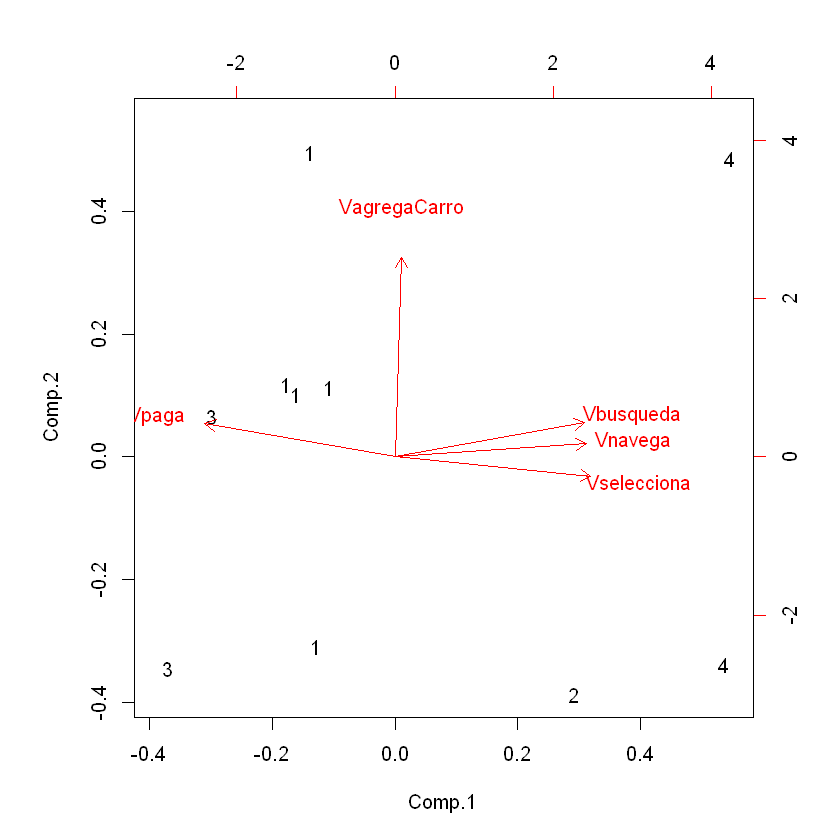

In [13]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
biplot(res,xlabs=cutree(hd,4))


In [4]:
library(rattle)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
biplot(res,xlabs=cutree(hd,4))
centros <- centers.hclust(datos,hd,4)
res2 <- predict(res,centros)
print(res2)
points(res2[,1:2],col=1:4,pch=19)

ERROR: Error in library(rattle): there is no package called 'rattle'


### Ejercicio 2:
1. Interprete el agrupamiento obtenido visualizado en el primer plano principal
2. ¿Es representativo de los datos este primer plano principal? Justifique

In [2]:
library(factoextra)
library(ggpubr)


fviz_dend(x = hd, k = 4, cex = 0.6) +
  geom_hline(yintercept = 5, linetype = "dashed") +
  labs(title = "Agrupamiento Jeráquico",
       subtitle = "Distancia euclídea, Lincage single, K=4")

fviz_cluster(object = list(data=datos, cluster=cutree(hd, k=4)),
             ellipse.type = "convex", repel = TRUE, show.clust.cent = TRUE,
             labelsize = 8)  +
  labs(title = "Agrupamiento Jeráquico + Proyección PCA",
       subtitle = "Distancia euclídea, Lincage single, K=4") +
  theme_bw() +
  theme(legend.position = "bottom")



print(res)
print(hd)

#biplot(res, xlabs= cutree(res,4))

ERROR: Error in library(factoextra): there is no package called 'factoextra'
